# Contextualization

![](https://media-exp1.licdn.com/dms/image/C4E12AQGbAM-_eriLMw/article-cover_image-shrink_720_1280/0/1632916005843?e=1669248000&v=beta&t=Jrz7HA1m-Qbhm08T89CaeaESJnsodVxsetVxJHVsVKM)

[Fonte da imagem](https://www.linkedin.com/pulse/supervised-vs-unsupervised-learning-whats-difference-smriti-saini/)

**Aprendizado não-supervisionado (unsupervised learning)**

No aprendizado não supervisionado, do qual **clustering** faz parte, **não há variável resposta**, e entre seus objetivos estão o tratamento, exploração e diagnóstico dos dados (exemplo: encontrar padrões).

**Exemplos:**
- **Clustering:** identificar e agrupar observações similares.
- **Dimensionality reduction:** reduzir a quantidade de dimensões (variáveis).

**Quantos algoritmos não-supervisionados temos?**

- Clustering: [https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html)
- Dimentionality reduction: [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

**Classifique como tarefa supervisionada ou não-supervisionada:**

1. Segmentação de clientes para entendermos melhor diferentes perfis: ________
2. Classificação de clientes em churn e não-churn: ________
3. Agrupamento de produtos similares entre si: ________
4. Redução da dimensionalidade dos dados: ________
5. Previsão da probabilidade de um cliente contratar o serviço: ________

<details>
  <summary><b>Respostas</b></summary>
  <ol type="1">
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  <li><b>unsupervised learning</b></li>
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  </ol>
</details>


# Setup

In [ ]:
!pip install prince
!pip install kmodes

In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# import prince                               # factor analysis (including categorical data)
# from kmodes.kmodes import KModes            # clustering categorical data
# from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='viridis',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

# K-means

App de simulação:
- [Versão em português (streamlit)](https://cmcouto-silva-kmeans-app-pt-streamlit-app-tyl62y.streamlitapp.com/)
- [Versão em português (dash)](https://kmeans-animation-pt.herokuapp.com/)
- [Versão em inglês](https://cmcouto-silva-kmeans-app-en-streamlit-app-v886a2.streamlitapp.com/)

**Requerimentos:**
- Dados numéricos contínuos
- Dados na mesma escala
- Pré-determinação do número de grupos (k)

**Vantagens:**
- Simples
- Eficiente
- Escalável para uma grande quantidade de dados

**Desvantagens:**
- Sensível a outliers
- Pré-determinação do número de grupos (k)
- Não adequado para dados categóricos (mesmo com one-hot encoding)
- Agrupa apenas pontos próximos entre si na "feature space"

Fontes:
- [https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided)
- Livro: Practical Statistics for Data Scientists (Peter Bruce et al., 2020)
- Statistical foruns

## Simulated Data

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,1.998996,1.535900
1,-2.788784,2.773154
2,-0.956255,3.630438
3,2.777738,-1.508286
4,0.982364,5.013279


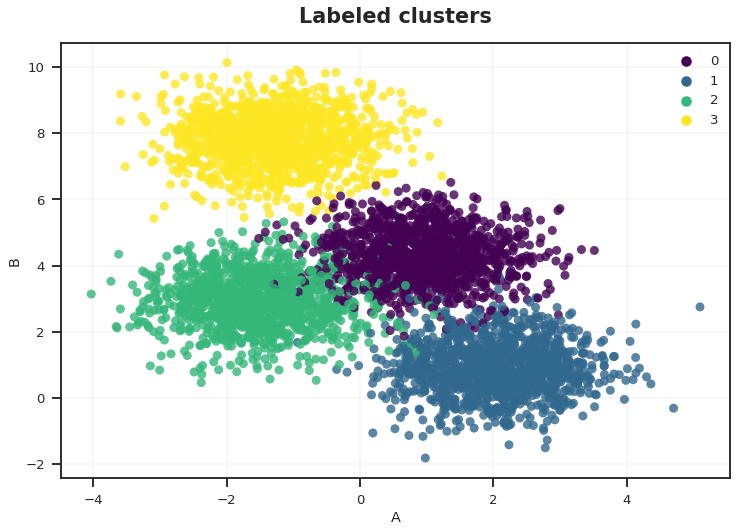

In [ ]:
# Visualize simulated clusters
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

## Distinct APIs for K-means

No sklearn, podemos utilizar algoritmos de clusterização através classes ou funções (vide [este link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)).

In [ ]:
# Usando função
centroids, labels, inertia = k_means(X, n_clusters=2, random_state=0)

In [ ]:
# Using KMeans
model = KMeans(n_clusters=2, random_state=0)
model.fit(X)

centroids = model.cluster_centers_
labels = model.labels_
intertia = model.inertia_

## Model evaluation

Uma boa clusterização vai produzir:
- Alta similaridade intra-cluster
- Pouca similaridade entre clusters

Métricas:
- Inércia
- Silhouette
- Davies Bouldin (`intracluster / intercluster`)
- Calinski Harabasz (`soma_intercluster / soma_intracluster`)

Exemplo de aplicação:

In [ ]:
silhouette_score(X, labels)
davies_bouldin_score(X, labels)
calinski_harabasz_score(X, labels)

6401.924184343904

Testando distintos agrupamentos:

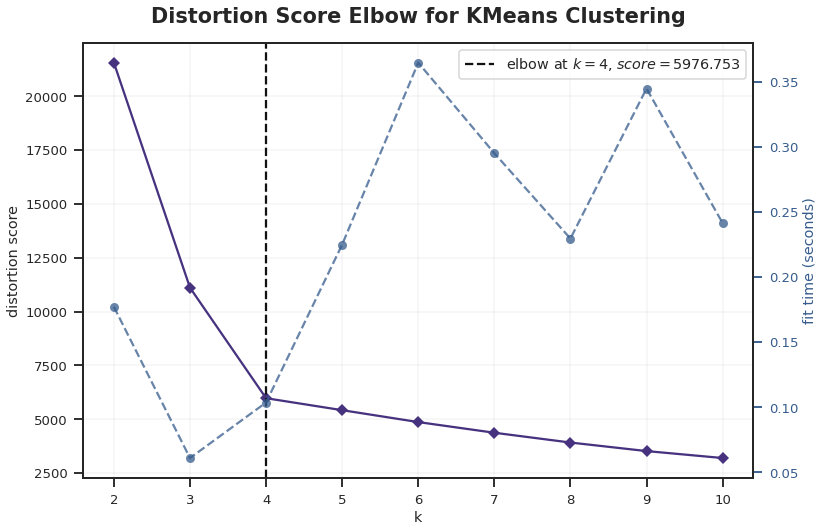

In [ ]:
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(2,11))
visualizer.fit(X).show()

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k':k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

In [ ]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Blues')

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,21560.408252,0.515911,0.622530,6401.924184
3,11109.654785,0.524957,0.707935,8561.144307
4,5976.759031,0.578246,0.585966,12037.104646
5,5420.318913,0.493568,0.824047,10080.863421
6,4868.312284,0.429343,0.982976,9091.901722
7,4372.174929,0.337104,1.128953,8528.016069
8,3917.117225,0.315862,1.175141,8240.152861
9,3520.796889,0.319956,1.089390,8090.919608
10,3197.647190,0.325477,1.010998,7972.906967


In [ ]:
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k').style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset='silhouette_score')
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,21560.408252,0.515911,0.622530,6401.924184
3,11109.654785,0.524957,0.707935,8561.144307
4,5976.759031,0.578246,0.585966,12037.104646
5,5420.318913,0.493568,0.824047,10080.863421
6,4868.312284,0.429343,0.982976,9091.901722
7,4372.174929,0.337104,1.128953,8528.016069
8,3917.117225,0.315862,1.175141,8240.152861
9,3520.796889,0.319956,1.089390,8090.919608
10,3197.647190,0.325477,1.010998,7972.906967


Repetindo procedimento acima com dados simulados aleatórios:

In [ ]:
X_random = np.random.rand(*X.shape)

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k':k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

In [ ]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Greys')

,inertia,silhouette_score,davies_bouldin_score
k,,,
2,514.694780,0.000000,58.125473
3,328.372709,-0.008048,57.559935
4,208.905462,-0.014633,67.203690
5,176.571486,-0.018640,133.034071
6,148.912290,-0.021145,161.319060
7,125.661587,-0.022214,155.599829
8,106.998933,-0.021319,235.750028
9,92.591305,-0.034420,139.731545
10,84.428547,-0.027712,189.033806


Comparando de forma interativa:

In [ ]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

## High dimensional data

In [ ]:
# Simulate clusters with high dimensional data
X_dim,y_dim = datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(X_dim, columns=list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

,A,B,C,D,E,F,G,H,I,J
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


In [ ]:
pca = PCA()
pca_components = pca.fit_transform(df_dim)
df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(df_dim.shape[1])])
display(df_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.856883,3.122523,6.136654,-0.686487,0.347968,-0.618029,-0.467717,-0.505754,-0.563464,0.814840
1,-11.436590,-6.559320,-4.410817,-1.239685,-0.029943,1.017996,0.895097,-0.878642,-0.584850,-0.537870
2,6.443283,9.334398,-3.091811,-1.298623,-0.771382,0.358402,0.372171,-0.301598,-1.050753,0.198899
3,5.114664,8.403564,-3.589742,-1.178399,-0.325189,-0.178110,-0.224107,-0.534450,0.190508,0.744221
4,-10.328252,-5.222973,-3.462066,0.586746,-0.655750,1.066886,-0.717080,0.606951,-1.759044,0.041215
...,...,...,...,...,...,...,...,...,...,...
995,-6.590360,3.422836,6.599212,-1.688134,0.281325,0.597289,0.406577,0.046039,0.643861,-0.928400
996,-7.330300,3.541334,4.587332,0.810124,1.054155,-1.566163,-0.340734,-0.499334,-1.155100,-0.353791
997,-6.411780,5.056657,5.401471,0.665292,0.160854,-0.069270,-0.404070,0.207449,0.184674,0.605232
998,-9.947851,-4.739351,-3.272195,0.732262,-0.496340,-0.558349,-0.108244,0.305074,-0.048046,-0.388834


In [ ]:
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

,explained_var,explained_var_cumsum
PC1,0.553295,0.553295
PC2,0.307542,0.860836
PC3,0.108453,0.969289
PC4,0.004899,0.974188
PC5,0.004765,0.978953
PC6,0.004509,0.983462
PC7,0.004389,0.987851
PC8,0.004282,0.992133
PC9,0.004086,0.996219
PC10,0.003781,1.000000


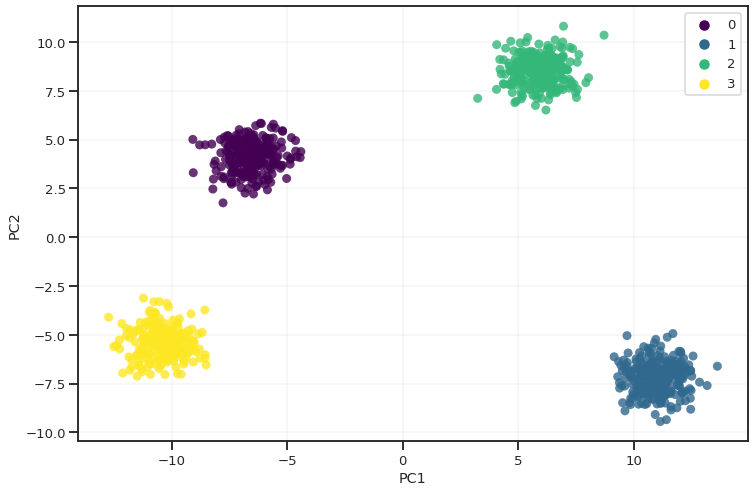

In [ ]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y, palette='viridis', alpha=0.8, linewidth=0)

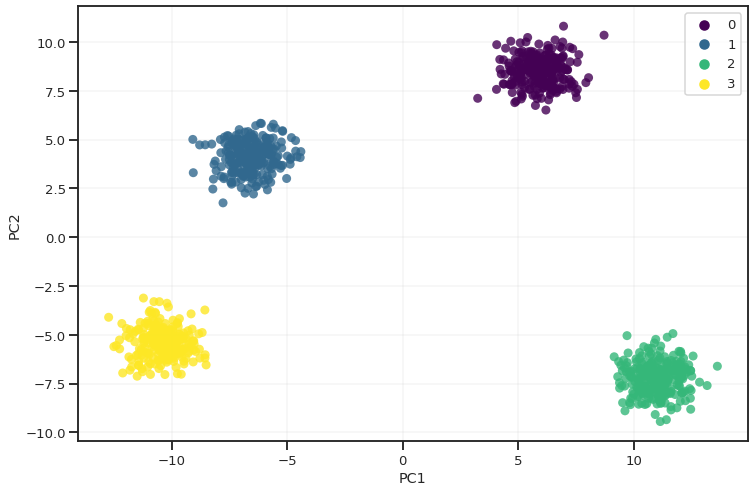

In [ ]:
labels = k_means(df_pca, 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=labels, **scatter_kwargs)

In [ ]:
px.scatter_3d(data_frame=df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')

# Hierarchical clustering

**Tipos:**
- Agglomerative (bottom-up)
- Dissimilarity (top-down)

**Vantagens:**
- Fácil interpretação
- Não é necessário estabelecer a quantidade de grupos previamente

**Desvantagens:**
- Não escala bem com muitos dados
- Dendograma fica com visualização inviável para muitas amostras
 

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-1.864189,8.266859
1,-0.020383,1.839675
2,-1.114917,8.343485
3,2.427797,-0.331331
4,-1.288313,3.978991


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

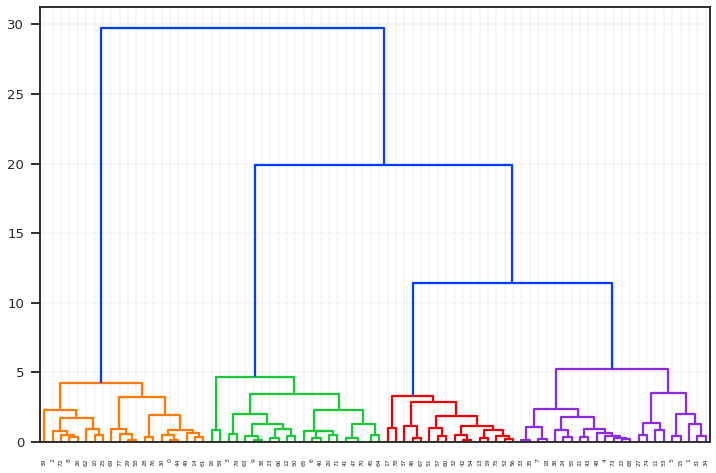

In [ ]:
Z = linkage(df, method='ward')
dendrogram_dict = dendrogram(Z, color_threshold=7)
plt.show()

In [ ]:
fcluster(Z, 4, criterion='maxclust')

array([1, 4, 1, 2, 4, 4, 2, 4, 1, 2, 1, 4, 2, 3, 1, 4, 2, 3, 4, 3, 2, 4,
       4, 2, 4, 1, 1, 4, 1, 1, 1, 4, 3, 4, 4, 4, 4, 3, 2, 1, 2, 2, 3, 4,
       1, 2, 3, 2, 4, 1, 2, 3, 3, 4, 3, 4, 3, 3, 1, 2, 3, 1, 1, 2, 2, 2,
       2, 3, 4, 1, 2, 2, 1, 4, 4, 3, 1, 1, 3, 2], dtype=int32)

# MeanShift

**Vantagens:**
- Possui apenas um parâmetro principal (bandwidth)
- Não necessita especificar a quantidade de clusters

**Desvantagens:**
- Computacionalmente custoso com grande volume de dados
- Não é possível especificar número de clusters

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


In [ ]:
estimate_bandwidth(X)

2.822735629625506

In [ ]:
model = MeanShift(n_jobs=-1)
model.fit(X)

MeanShift(n_jobs=-1)

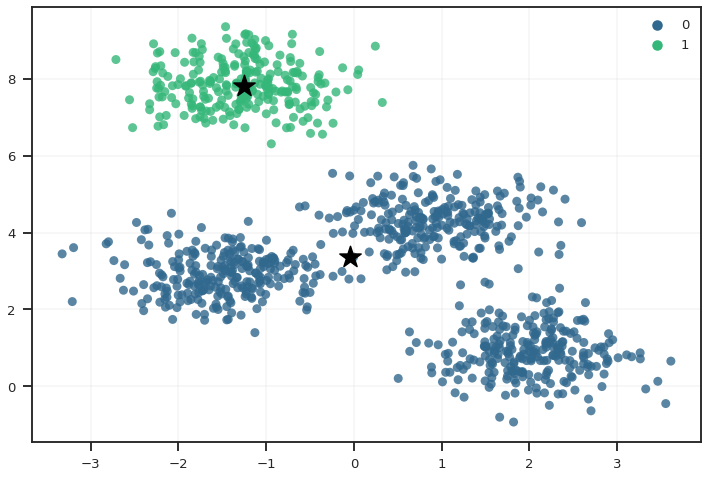

In [ ]:
labels = model.predict(X)
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, **scatter_kwargs)
ax.scatter(*model.cluster_centers_.T, marker='*', s=500, color='black')

In [ ]:
print(silhouette_score(X, labels))
print(davies_bouldin_score(X, labels))

0.5324827970890266
0.5812242300026665


In [ ]:
@interact(bandwidth=(0.1, 3, 0.01))
def custom_meanshift(bandwidth):
  model = MeanShift(bandwidth=bandwidth, n_jobs=-1).fit(X)
  labels = model.predict(X)
  ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, **scatter_kwargs)
  ax.scatter(*model.cluster_centers_.T, marker='*', s=500, color='black')
  print()

interactive(children=(FloatSlider(value=1.55, description='bandwidth', max=3.0, min=0.1, step=0.01), Output())…

# DBSCAN

**Vantagens:**
- Não necessita especificar a quantidade de clusters
- Detecta clusters de formatos variados (densos)
- Robusto aos outliers

**Desvantagens:**
- A qualidade do cluster depende muito métrica de distância
- Não funciona bem em clusters com densidades diferentes (OPTICS)

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.6, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.004128,7.852632
1,0.670479,4.040943
2,-2.263678,8.273068
3,-2.350730,2.277237
4,2.228740,1.145386


In [ ]:
dbscan?

In [ ]:
@interact(eps=(0.01, 1, 0.01), min_samples=(1,20))
def custom_dbscan(eps, min_samples):
  _,labels = dbscan(X, eps=eps, min_samples=min_samples)
  sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, **scatter_kwargs)
  plt.show()

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

# Wine dataset

## Carregando dados

In [ ]:
df_wines,_ = datasets.load_wine(as_frame=True, return_X_y=True)
df_wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Data cleaning

Há dados duplicados?

In [ ]:
df_wines.duplicated().sum()

0

Há dados faltantes?

In [ ]:
df_wines.isna().sum().sum()

0

Há outliers?

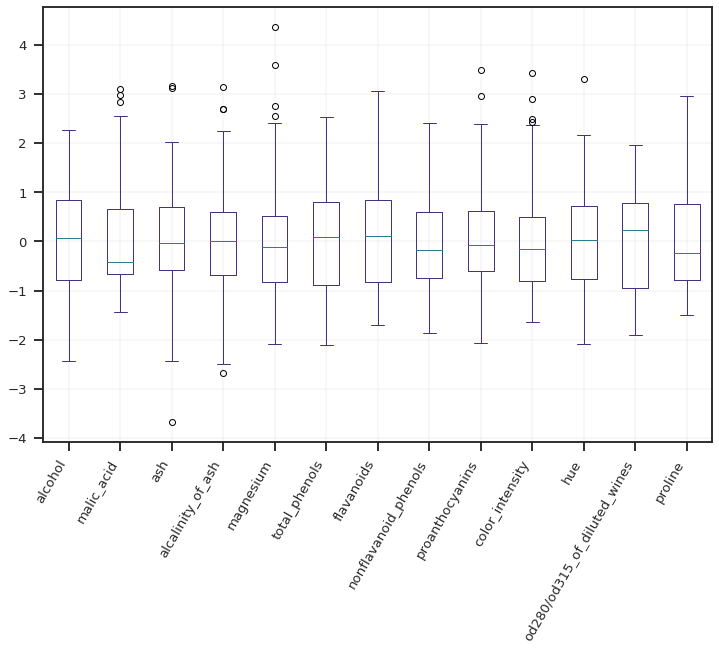

In [ ]:
# Scaling
df_wines_scaled = df_wines.apply(scale)
# Plot
df_wines_scaled.plot.box()
plt.xticks(rotation=60, ha='right');

Identificando e removendo linhas com outliers (|Z-score| > 3):

In [ ]:
outlier_rows = (df_wines_scaled.abs()>3).any(axis=1)
outlier_rows.sum()

10

In [ ]:
df_wines_scaled = df_wines_scaled[~outlier_rows]

In [ ]:
df_wines_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Verificando melhor K

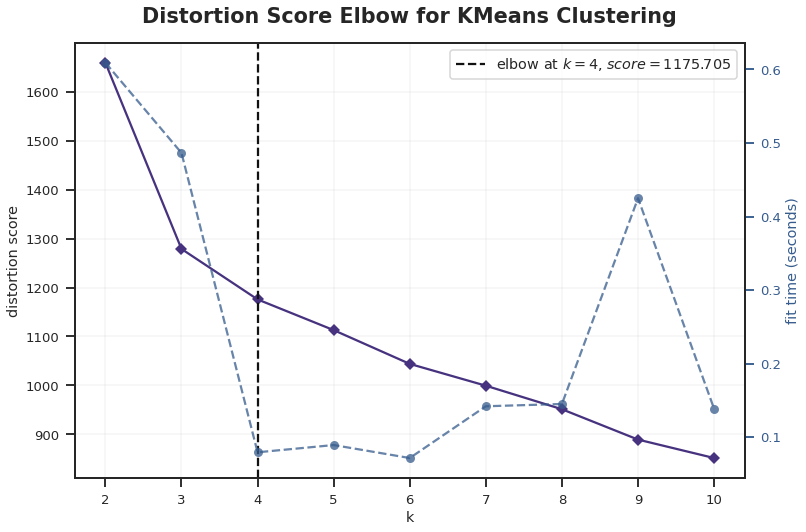

In [ ]:
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(2,11))
visualizer.fit(df_wines_scaled).show();

## Clusterizando

Criando e treinando modelo

In [ ]:
kmeans = KMeans(4, random_state=0).fit(df_wines_scaled)

Salvando centroides e labels

In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.predict(df_wines_scaled)

## Interpretando clusters

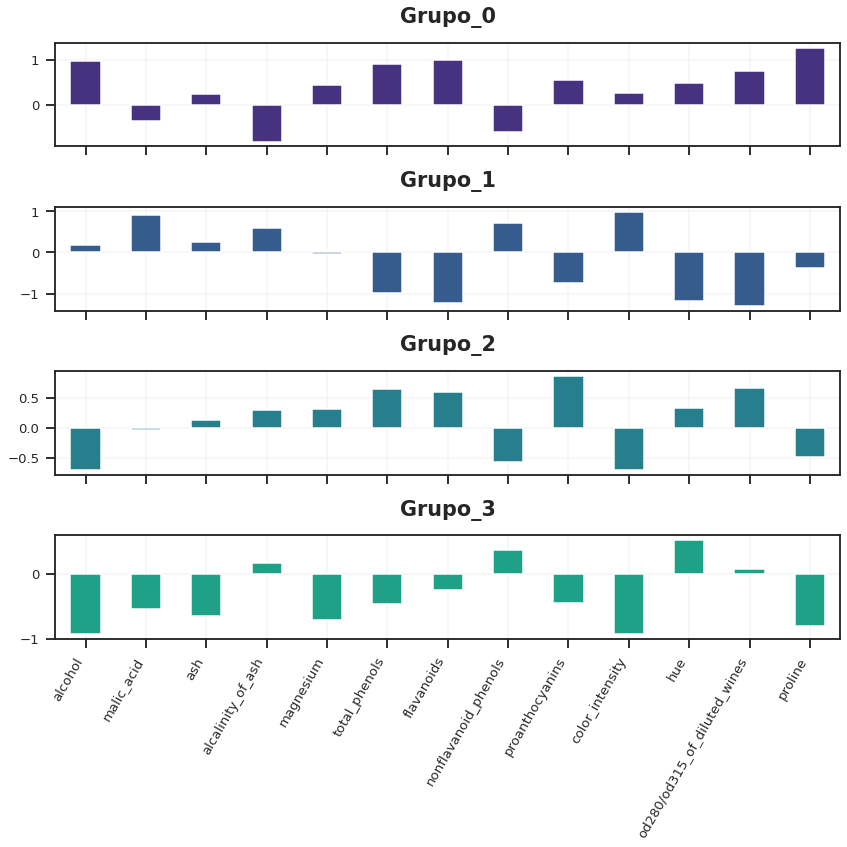

In [ ]:
pd.DataFrame(centroids, columns=df_wines.columns).T.add_prefix('Grupo_').plot.bar(subplots=True, figsize=(12,12), legend=False)
plt.xticks(rotation=60, ha='right')
plt.tight_layout();

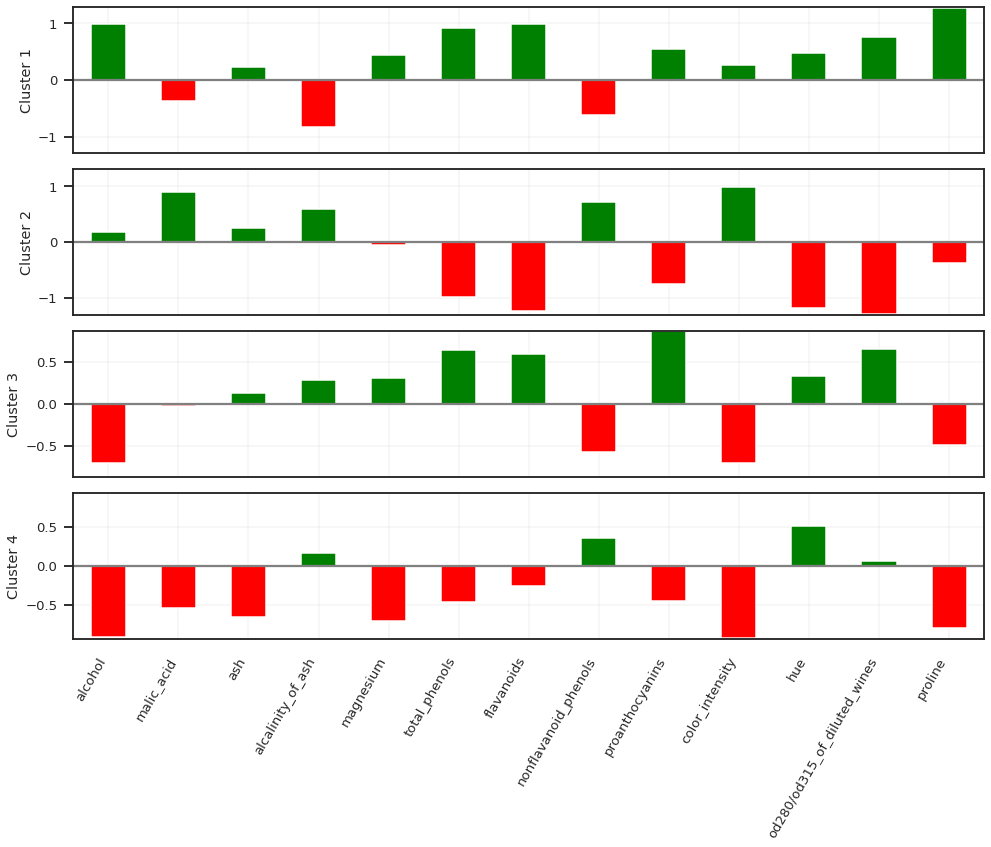

In [ ]:
# Adaptado do livro "Practical Statistics for Data Scientists"
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none') 

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
(
    df_wines[~outlier_rows].assign(cluster=labels)
    .groupby('cluster')
    .agg(['mean','min','median','max'])
)

alcohol                       malic_acid                     \
              mean    min  median    max       mean   min median   max   
cluster                                                                  
0        13.795926  12.85  13.795  14.83   1.933333  1.35  1.740  4.04   
1        13.126875  12.20  13.135  14.16   3.379167  1.24  3.285  5.65   
2        12.444583  11.45  12.370  13.86   2.222500  0.89  1.900  4.43   
3        12.281905  11.41  12.195  13.67   1.756667  0.74  1.610  4.30   

              ash        ...    hue       od280/od315_of_diluted_wines        \
             mean   min  ... median   max                         mean   min   
cluster                  ...                                                   
0        2.430370  2.04  ...   1.07  1.28                     3.145185  2.51   
1        2.429167  2.10  ...   0.67  0.96                     1.684583  1.27   
2        2.395000  1.70  ...   1.04  1.42                     3.055000  2.26   
3        2.207381  1.70  ...   1.03  1.45                     2.671667  1.59   

                          proline                         
        median   max         mean    min  median     max  
cluster                                                   
0        3.135  4.00  1147.537037  760.0  1112.5  1680.0  
1        1.660  2.47   626.875000  415.0   622.5   880.0  
2        3.125  3.82   564.125000  290.0   572.5   886.0  
3        2.730  3.57   497.309524  278.0   484.0   870.0  

[4 rows x 52 columns]

In [ ]:
(
    df_wines[~outlier_rows].assign(cluster=labels)
    .groupby('cluster')
    .mean()
    .transpose()
    .style.background_gradient(axis=1, cmap='YlOrRd')
)

cluster,0,1,2,3
alcohol,13.795926,13.126875,12.444583,12.281905
malic_acid,1.933333,3.379167,2.222500,1.756667
ash,2.430370,2.429167,2.395000,2.207381
alcalinity_of_ash,16.724074,21.364583,19.741667,20.245238
magnesium,106.129630,99.041667,97.500000,89.761905
total_phenols,2.862222,1.654792,2.674167,1.996667
flavanoids,3.017407,0.787292,2.574167,1.790952
nonflavanoid_phenols,0.285185,0.449167,0.287083,0.406667
proanthocyanins,1.907778,1.131042,1.974167,1.339048
color_intensity,5.664630,7.225417,3.449167,2.955238


# Dataset with mix data

**Clustering com dados categóricos:**
- kmodes (apenas dados categóricos)
- kprototypes (dados numéricos e categóricos)
- hierarquical clustering com Glower' distance

**Análises de associação / redução de dimensionalidade:**
- Análise de correspondência simples (CA) - apenas dados categóricos com 2 variáveis
- Análise de correspondência múltipla (MCA) - apenas dados categóricos com 2 ou mais variáveis
- FAMD - dados mistos

## Dados categóricos

In [ ]:
from yellowbrick.datasets import load_mushroom

In [ ]:
df_mushroom = load_mushroom()[0]
df_mushroom

,shape,surface,color
0,convex,smooth,yellow
1,bell,smooth,white
2,convex,scaly,white
3,convex,smooth,gray
4,convex,scaly,yellow
...,...,...,...
8118,knobbed,smooth,brown
8119,convex,smooth,brown
8120,flat,smooth,brown
8121,knobbed,scaly,brown


In [ ]:
kmodes_model = KModes(n_clusters=3)
labels = kmodes_model.fit_predict(df_mushroom)
print(labels)
print(kmodes_model.cost_)

[0 1 0 ... 1 0 0]
10343.0


In [ ]:
custos = [KModes(n_clusters=k).fit(df_mushroom).cost_ for k in range(2,11)]

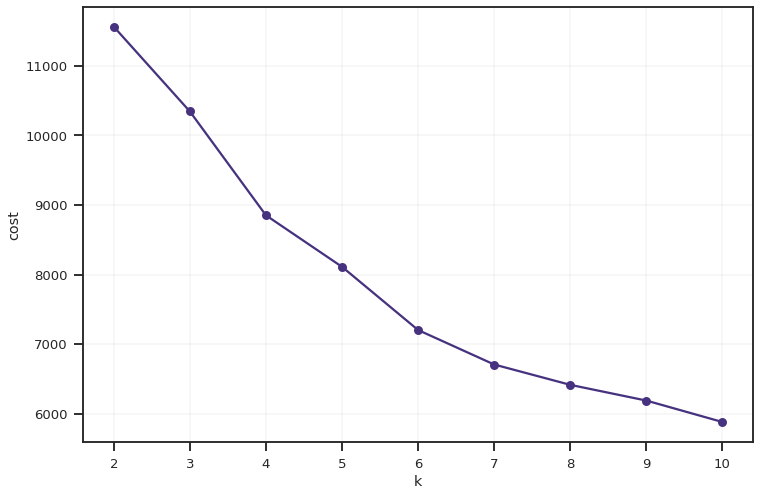

In [ ]:
ax = pd.Series(custos, index=range(2,11)).plot(marker='o')
ax.set(xlabel='k', ylabel='cost');

## Dados mistos

In [ ]:
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/Ekeany/Clustering-Mixed-Data/main/data/heart.csv')
df_diabetes = df_diabetes.drop(columns='target')
df_diabetes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
# Padroniza dados numéricos
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_diabetes[numerical_columns] = df_diabetes[numerical_columns].apply(scale)

In [ ]:
# Define posições dos dados categóricos
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_idx = df_diabetes.columns.isin(categorical_columns).nonzero()[0].tolist()

In [ ]:
# Modelo
kproto_model = KPrototypes()
kproto_model.fit_predict(df_diabetes, categorical=categorical_idx)

array([4, 1, 1, 1, 5, 0, 5, 1, 0, 0, 0, 5, 1, 7, 5, 3, 5, 2, 1, 0, 7, 1,
       1, 0, 1, 0, 0, 3, 6, 3, 1, 7, 1, 5, 3, 1, 5, 0, 0, 6, 5, 1, 3, 5,
       5, 5, 1, 5, 3, 5, 5, 7, 7, 1, 5, 1, 1, 1, 1, 5, 7, 5, 1, 3, 0, 1,
       3, 1, 1, 7, 7, 1, 1, 5, 1, 5, 1, 0, 1, 7, 1, 5, 5, 5, 3, 6, 7, 1,
       3, 7, 1, 1, 1, 5, 3, 2, 6, 3, 5, 1, 1, 4, 0, 1, 1, 7, 0, 5, 1, 5,
       0, 0, 5, 1, 5, 1, 1, 7, 1, 5, 2, 5, 1, 5, 1, 1, 3, 0, 1, 7, 0, 5,
       1, 1, 5, 5, 3, 7, 3, 2, 5, 1, 1, 7, 2, 0, 1, 0, 1, 1, 4, 7, 0, 0,
       1, 3, 1, 1, 7, 5, 1, 5, 1, 1, 1, 2, 2, 4, 7, 4, 7, 1, 7, 4, 2, 3,
       7, 5, 3, 2, 6, 2, 5, 7, 4, 5, 2, 2, 1, 1, 6, 2, 3, 4, 4, 4, 4, 7,
       2, 7, 1, 4, 2, 0, 4, 5, 7, 4, 3, 0, 7, 4, 3, 6, 7, 6, 2, 6, 2, 5,
       6, 4, 7, 4, 3, 2, 2, 3, 0, 2, 1, 2, 2, 2, 2, 5, 5, 5, 7, 1, 2, 0,
       2, 2, 2, 5, 6, 2, 0, 2, 4, 3, 2, 7, 0, 5, 4, 2, 0, 4, 0, 1, 2, 7,
       3, 7, 4, 3, 2, 2, 3, 4, 2, 7, 3, 1, 2, 7, 5, 4, 6, 3, 3, 1, 2, 2,
       0, 0, 6, 2, 0, 4, 4, 0, 3, 4, 7, 2, 2, 3, 4,

In [ ]:
# custo
kproto_model.cost_

1052.224906460806